In [ ]:
# pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier

In [ ]:
df = pd.read_csv('data.csv')
X = df.iloc[:,1:-1]

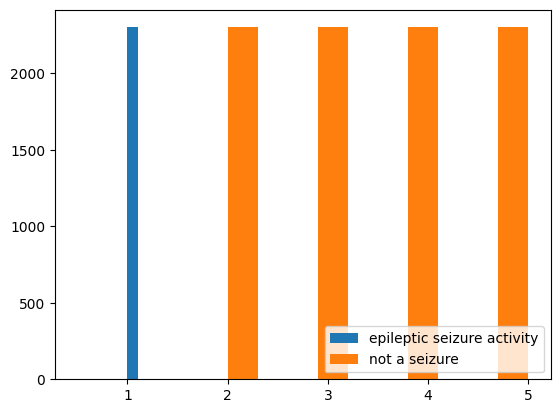

<bound method IndexOpsMixin.value_counts of 0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: column_a, Length: 11500, dtype: object>

In [ ]:
def hist(df,plt):
  plt.hist(df[df["y"]==1]["y"],label="epileptic seizure activity")
  plt.hist(df[df["y"]!=1]["y"],label="not a seizure")
  plt.legend(loc='lower right')
  plt.show()

hist(df,plt)

y = df.iloc[:,0]
df["column_a"].value_counts

In [ ]:
#This method drop the unnecessary column (Unnamed: 0) and transform the target variable
def prepareData(df):
  df["y"]=[1 if df["y"][i]==1 else 0 for i in range(len(df["y"]))]
  target=df["y"]
  df_copy=df.drop(["column_a","y"],axis=1)
  return df_copy,target

df_freq,target_freq=prepareData(df)
df_freq.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
# apply FFT to convert the time series data to frequency domain
fft_data = np.abs(fft(df_freq))

# extract the power spectral density (PSD) features
psd_data = np.square(fft_data) / len(df_freq)

# prepare the feature matrix and target vector for SVM training
X = psd_data
X = pd.DataFrame(X)
df_freq = pd.concat((X, target_freq), axis=1)
df_freq.head(30)

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,y
0,787.83,538.22,805.03,1820.48,766.12,73.32,36.97,59.32,312.83,150.49,...,150.49,312.83,59.32,36.97,73.32,766.12,1820.48,805.03,538.22,0
1,2177.39,4916.28,24040.27,84692.41,42108.33,27357.50,3636.48,23980.15,25914.14,3198.86,...,3198.86,25914.14,23980.15,3636.48,27357.50,42108.33,84692.41,24040.27,4916.28,1
2,5344.83,114.71,500.97,155.83,159.95,140.66,65.98,150.10,230.53,165.64,...,165.64,230.53,150.10,65.98,140.66,159.95,155.83,500.97,114.71,0
3,13083.02,37.26,33.20,24.18,19.88,2.17,2.70,34.50,0.83,15.57,...,15.57,0.83,34.50,2.70,2.17,19.88,24.18,33.20,37.26,0
4,121.90,585.66,46.14,113.24,46.36,90.37,20.75,21.78,33.63,78.97,...,78.97,33.63,21.78,20.75,90.37,46.36,113.24,46.14,585.66,0
5,578.37,1404.63,41.74,129.32,48.03,179.71,71.20,71.23,32.26,39.75,...,39.75,32.26,71.23,71.20,179.71,48.03,129.32,41.74,1404.63,0
6,539.14,170.78,75.97,15.78,39.89,13.79,95.68,159.21,777.09,1026.86,...,1026.86,777.09,159.21,95.68,13.79,39.89,15.78,75.97,170.78,0
7,2918.16,53.95,1227.81,42.94,308.30,25.79,90.50,17.85,12.60,32.60,...,32.60,12.60,17.85,90.50,25.79,308.30,42.94,1227.81,53.95,0
8,2766.05,1257.33,812.34,1911.49,3805.48,3104.60,9902.58,1649.15,749.10,512.08,...,512.08,749.10,1649.15,9902.58,3104.60,3805.48,1911.49,812.34,1257.33,1
9,44.83,27.01,72.22,60.73,9.41,44.54,3.03,153.84,73.72,54.41,...,54.41,73.72,153.84,3.03,44.54,9.41,60.73,72.22,27.01,0


1
0
1
1
1
0
0
1
0
0


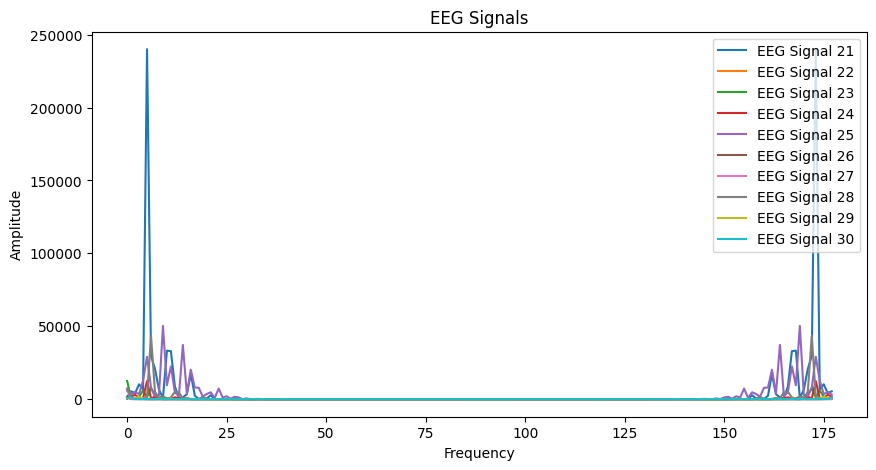

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

for i in range(20, 30):
    print(df_freq.iloc[i, -1])
    ax.plot(df_freq.iloc[i, :-1], label='EEG Signal {}'.format(i+1))

ax.legend(loc='upper right')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_title('EEG Signals')
plt.show()

0    4200
1    2300
Name: y, dtype: int64

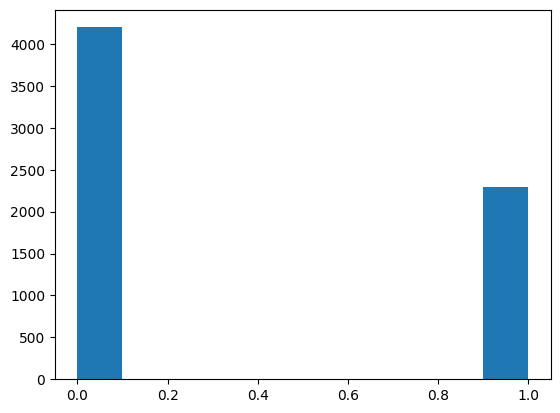

In [ ]:
def createBalancedDataset(data,random_state):
  X = shuffle(data,random_state=random_state)
  return X.sort_values(by='y', ascending=False).iloc[:6500].index

v=createBalancedDataset(df_freq, 42)
plt.hist((df_freq.iloc[v])['y'])
(df_freq.iloc[v]['y']).value_counts() #more balanced dataset

In [ ]:
#normalizing dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_freq.drop(['y'],axis=1))
n_df_fea=pd.DataFrame(scaler.transform(df_freq.drop(['y'],axis=1)))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_trainr, X_testr, y_trainr, y_testr = train_test_split(n_df_fea.iloc[v], target_freq.iloc[v], test_size=0.30, random_state=42)

In [ ]:
X_train_random_sampling, X_test_random_sampling, y_train_random_sampling, y_test_random_sampling = train_test_split(X_trainr, y_trainr, test_size=0.30, random_state=42)
print(X_train_random_sampling.shape, X_test_random_sampling.shape, y_train_random_sampling.shape, y_test_random_sampling.shape)

(3185, 178) (1365, 178) (3185,) (1365,)


In [ ]:
# This is done to just test the accuracy in case of SVM classifier
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

#I will explain this model in model part in the notebook
clf = svm.SVC(kernel="linear")
clf.fit(X_trainr, y_trainr)
#cross validation is 10
y_pred = cross_val_predict(clf,X_testr,y_testr,cv=10)
print("All features are inclueded\n",classification_report(y_testr, y_pred))

All features are inclueded
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1373
           1       0.99      0.71      0.83       772

    accuracy                           0.89      2145
   macro avg       0.92      0.85      0.87      2145
weighted avg       0.91      0.89      0.89      2145



Selecting most important 20 features with Random Forest

In [ ]:
#Firstly I used grid Search for getting best hyperparameter for random-forest
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'max_depth': [2,5],
    'min_samples_split':[2,5,10],
    'n_estimators': [100,150],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_trainr, y_trainr)
print (CV_rfc.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,max_depth=5,max_features='auto',min_samples_split=2,n_estimators=150)
clf.fit(X_trainr, y_trainr)
#I also get the importance rates and sort in a desending order and create a dataframe
zipped=pd.DataFrame(zip(X_trainr.columns,clf.feature_importances_),columns=["column","importance"]).sort_values(by="importance", ascending=False)
y_pred2 = cross_val_predict(clf,X_testr,y_testr,cv=10)
print("All featuares are included\n",classification_report(y_testr, y_pred2))

All featuares are included
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.96      0.96      0.96       772

    accuracy                           0.97      2145
   macro avg       0.97      0.97      0.97      2145
weighted avg       0.97      0.97      0.97      2145



In [ ]:
zipped.head(20) #The most important 20 values according to random forest

,column,importance
172,172,0.10
6,6,0.07
7,7,0.06
5,5,0.06
173,173,0.05
8,8,0.05
171,171,0.05
163,163,0.05
165,165,0.04
15,15,0.03


Epoch 1/50
61/61 - 11s - loss: 0.6306 - accuracy: 0.6696 - val_loss: 0.6049 - val_accuracy: 0.8033 - 11s/epoch - 188ms/step
Epoch 2/50
61/61 - 6s - loss: 0.5323 - accuracy: 0.7963 - val_loss: 0.3567 - val_accuracy: 0.8825 - 6s/epoch - 102ms/step
Epoch 3/50
61/61 - 8s - loss: 0.5672 - accuracy: 0.7265 - val_loss: 0.5130 - val_accuracy: 0.8005 - 8s/epoch - 129ms/step
Epoch 4/50
61/61 - 8s - loss: 0.5066 - accuracy: 0.7770 - val_loss: 0.4809 - val_accuracy: 0.8368 - 8s/epoch - 127ms/step
Epoch 5/50
61/61 - 9s - loss: 0.5917 - accuracy: 0.7104 - val_loss: 0.6052 - val_accuracy: 0.8746 - 9s/epoch - 139ms/step
Epoch 6/50
61/61 - 8s - loss: 0.6026 - accuracy: 0.7392 - val_loss: 0.5233 - val_accuracy: 0.8121 - 8s/epoch - 129ms/step
Epoch 7/50
61/61 - 6s - loss: 0.3859 - accuracy: 0.8650 - val_loss: 0.2961 - val_accuracy: 0.9110 - 6s/epoch - 106ms/step
Epoch 8/50
61/61 - 8s - loss: 0.4772 - accuracy: 0.8152 - val_loss: 0.3283 - val_accuracy: 0.9026 - 8s/epoch - 130ms/step
Epoch 9/50
61/61 - 8s 

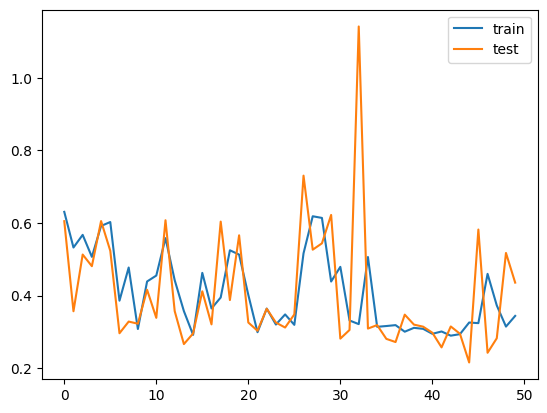

In [ ]:
# Tried LSTM implementation
#LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
# When i designed the network, Basically i used heuristic approach
X_trainrr=np.array(X_trainr).reshape(X_trainr.shape[0],X_trainr.shape[1],1)
X_testrr=np.array(X_testr).reshape(X_testr.shape[0],X_testr.shape[1],1)
model = Sequential()
model.add(LSTM(50, input_shape=(X_trainrr.shape[1], X_trainrr.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# fit network
history = model.fit(X_trainrr, y_trainr, epochs=50, batch_size=72, validation_data=(X_testrr, y_testr), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
###################################################################################### Using Lazy predict classfier ########################################################################################333

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_trainr, X_testr, y_trainr, y_testr)
models

100%|██████████| 29/29 [01:03<00:00,  2.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,2.37
RandomForestClassifier,0.98,0.98,0.98,0.98,8.03
XGBClassifier,0.98,0.98,0.98,0.98,10.78
ExtraTreesClassifier,0.98,0.98,0.98,0.98,1.04
Perceptron,0.98,0.98,0.98,0.98,0.10
BaggingClassifier,0.97,0.97,0.97,0.97,12.35
SGDClassifier,0.97,0.96,0.96,0.97,0.24
AdaBoostClassifier,0.96,0.96,0.96,0.96,10.89
LinearSVC,0.96,0.95,0.95,0.96,1.28


In [ ]:
clf_random_sampling = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_random_sampling,predictions_random_sampling = clf.fit(X_train_random_sampling, X_test_random_sampling, y_train_random_sampling, y_test_random_sampling)
models_random_sampling

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:35<00:00,  1.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,3.94
XGBClassifier,0.98,0.98,0.98,0.98,5.91
RandomForestClassifier,0.97,0.97,0.97,0.97,4.52
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.70
BaggingClassifier,0.97,0.96,0.96,0.97,5.77
AdaBoostClassifier,0.96,0.96,0.96,0.96,4.33
SGDClassifier,0.96,0.96,0.96,0.96,0.32
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.80
LinearSVC,0.96,0.95,0.95,0.96,0.67


In [ ]:
########################################################################### Trying out after doing feature extraction ################################################################

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,max_depth=5,max_features='sqrt',min_samples_split=2,n_estimators=150)
clf.fit(X_trainr, y_trainr)
#I also get the importance rates and sort in a desending order and create a dataframe
zipped=pd.DataFrame(zip(X_trainr.columns,clf.feature_importances_),columns=["column","importance"]).sort_values(by="importance", ascending=False)

In [ ]:
X_trainr_FE = X_trainr[zipped.iloc[:,:20].index]
y_trainr_FE = y_trainr
X_testr_FE = X_testr[zipped.iloc[:,:20].index]
y_testr_FE = y_testr
##############################################################################
X_train_random_sampling_FE = X_train_random_sampling[zipped.iloc[:,:20].index]
y_train_random_sampling_FE = y_train_random_sampling
X_test_random_sampling_FE = X_test_random_sampling[zipped.iloc[:,:20].index]
y_test_random_sampling_FE = y_test_random_sampling

In [ ]:
clf_FE = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_FE,predictions_FE = clf_FE.fit(X_trainr_FE, X_testr_FE, y_trainr_FE, y_testr_FE)
models_FE

100%|██████████| 29/29 [00:59<00:00,  2.07s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.98,0.98,0.98,9.13
RandomForestClassifier,0.98,0.98,0.98,0.98,6.50
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.97
Perceptron,0.98,0.98,0.98,0.98,0.09
LGBMClassifier,0.98,0.98,0.98,0.98,3.41
BaggingClassifier,0.97,0.97,0.97,0.97,9.19
SGDClassifier,0.97,0.96,0.96,0.97,0.23
DecisionTreeClassifier,0.96,0.96,0.96,0.96,1.42
AdaBoostClassifier,0.96,0.96,0.96,0.96,12.70


In [ ]:
clf_random_sampling_FE = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_random_sampling_FE,predictions_random_sampling_FE = clf_random_sampling_FE.fit(X_train_random_sampling_FE, X_test_random_sampling_FE, y_train_random_sampling_FE, y_test_random_sampling_FE)
models_random_sampling_FE

100%|██████████| 29/29 [00:34<00:00,  1.17s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,3.95
XGBClassifier,0.98,0.98,0.98,0.98,5.18
RandomForestClassifier,0.97,0.97,0.97,0.97,4.18
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.68
BaggingClassifier,0.97,0.97,0.97,0.97,6.02
AdaBoostClassifier,0.96,0.96,0.96,0.96,4.37
SGDClassifier,0.96,0.96,0.96,0.96,0.19
LinearSVC,0.96,0.95,0.95,0.96,0.69
LogisticRegression,0.96,0.95,0.95,0.96,0.15
